In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/17-645/PopcornTime_MLinProd"

/content/drive/.shortcut-targets-by-id/1m1h6atD_1yYXiQoSTMMQlUS4l2XaLI2E/PopcornTime_MLinProd


In [3]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
import scipy.linalg as la
from sklearn.metrics import mean_squared_error
from time import perf_counter as pc
from tqdm import tqdm
from matplotlib import pyplot as plt

In [4]:
! pip install implicit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.6 MB 1.1 MB/s 


In [5]:
from implicit.gpu.als import AlternatingLeastSquares
from implicit.gpu.bpr import BayesianPersonalizedRanking

from implicit.cpu.lmf import LogisticMatrixFactorization

from implicit.evaluation import precision_at_k, mean_average_precision_at_k, ndcg_at_k

In [6]:
def load_data(dataset):
  train = sp.load_npz('Data/Split/train_' + dataset + '.npz')
  val = sp.load_npz('Data/Split/val_' + dataset + '.npz')
  test = sp.load_npz('Data/Split/test_' + dataset + '.npz')

  return train, val, test

In [7]:
def training(n_epochs=20):
  pak_list = []

  for epoch in tqdm(range(n_epochs)):
    model.fit(train, show_progress=False)
    pak_list.append(precision_at_k(model, train, val, K=20, show_progress=False))

  mapk = mean_average_precision_at_k(model, train, val, K=20, show_progress=False)
  ndcgk= ndcg_at_k(model, train, val, K=20, show_progress=False)

  return pak_list, mapk, ndcgk

In [8]:
def run_training(n_epochs):
  pak_list, mapk, ndcgk = training(n_epochs=30)
  
  pak_list = np.array(pak_list)
  plt.plot(pak_list)
  plt.show()

  print("P@k = {}".format(pak_list[-1]))
  print("MAP@k = {}".format(mapk))
  print("NDCG@k = {}".format(ndcgk))
  print("Best validation p@K at epoch {}: {}".format(np.argmax(pak_list)+1, np.max(pak_list)))

In [ ]:
train, val, test = load_data('1500k')

In [ ]:
model = AlternatingLeastSquares(iterations=1, factors=32, regularization=0.01, alpha=1)
# model = BayesianPersonalizedRanking(iterations=1, factors=100)
# model = LogisticMatrixFactorization(iterations=1, factors=200)

100%|██████████| 30/30 [00:07<00:00,  4.26it/s]


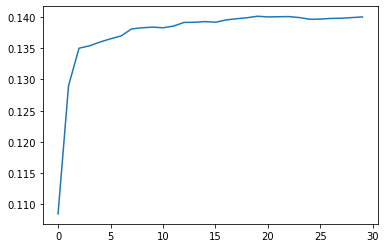

P@k = 0.140027340713539
MAP@k = 0.03588836102521367
NDCG@k = 0.05828870652170411
Best validation p@K at epoch 20: 0.14013455919800574


In [ ]:
run_training(30)

In [10]:
data = sp.load_npz('Data/Full/X_1500k.npz')
model = AlternatingLeastSquares(iterations=30, factors=32, regularization=0.01, alpha=1)
model.fit(data, show_progress=False)

In [11]:
model.save('als.npz')

/usr/local/lib/python3.7/dist-packages/implicit/utils.py:29: UserWarning: OpenBLAS detected. Its highly recommend to set the environment variable 'export OPENBLAS_NUM_THREADS=1' to disable its internal multithreading
  "OpenBLAS detected. Its highly recommend to set the environment variable "
